In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [22]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
import pandas as pd

from fastai.imports import *
from fastai.structured import *

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

### Leitura do csv e conversão em dataframe

In [ ]:
!ls

In [ ]:
df_beneficios = pd.read_csv('concedidos201812.csv',header=0, encoding='latin-1',sep=';')

### Exploração Inicial 

In [ ]:
df_beneficios.columns

In [ ]:
print(df_beneficios.dtypes)

In [ ]:
df_beneficios.head()

In [ ]:
display_all(df_beneficios.head().T)

In [ ]:
display_all(df_beneficios.describe( include='all' ).T)

In [ ]:
display_all(df_beneficios.isnull().sum().sort_index()/len(df_beneficios))
#Aparentemente nao tem nulls

In [ ]:
# Salva como feather 
df_beneficios.to_feather("df_beneficios.feather")

In [ ]:
!ls

## PreProcessamento 

In [4]:
df_raw = pd.read_feather('df_beneficios.feather')

In [5]:
display_all(df_raw.head().T)

,0,1,2,3,4
Competência concessão,201812,201812,201812,201812,201812
Espécie,Pensão por Morte Previdenciária,Auxílio Salario Maternidade,Aposentadoria por Tempo de Contribuição,Auxílio Salario Maternidade,Pensão por Morte Previdenciária
CID,Zerados,Zerados,Zerados,Zerados,Zerados
Despacho,Concessao Decorrente,Concessao Normal,Concessao com Conver,Concessao Normal,Concessao Normal
Dt Nascimento,22/06/2005,14/08/1994,09/12/1959,20/08/1981,04/01/1956
Clientela,Urbano,Rural,Urbano,Urbano,Urbano
Mun Resid,02043-AL-Maceió,03038-AM-São Paulo d,04307-BA-Simões Filh,04275-BA-Salvador,04007-BA-Alagoinhas
Vínculo dependentes,Filho,Filho,Não Informado,Filho,Cônjuge
Forma Filiação,Empregado,Segurado Especial,Autônomo,Facultativo,Autônomo
UF,Alagoas,Amazonas,Bahia,Bahia,Bahia


In [ ]:
## Transformando Data Nascimento em diversas colunas para exploração
#add_datepart(df_raw,'Dt Nascimento')

In [ ]:
df_raw.dtypes

In [ ]:
#df_raw['Espécie'] = df_raw['Espécie'].astype(str)

In [ ]:
#df_raw['Qt SM RMI'] = df_raw['Qt SM RMI'].str.replace(r'(',')', '.') ###ERRO 

In [ ]:
display_all(df_raw['Qt SM RMI'])

In [6]:
#Converte a virgula para ponto para poder converter de str para float
df_raw['Qt-SM'] = df_raw['Qt SM RMI'].str.replace(',' , '.' )
df_raw['Qt-SM'] = df_raw['Qt-SM'].astype(float)

In [7]:
df_raw['Qt-SM'].head()

0    4.326
1    1.000
2    1.586
3    1.000
4    1.000
Name: Qt-SM, dtype: float64

In [8]:
df_raw['Qt-SM'].describe()

count    339434.000000
mean          1.477993
std           0.994561
min           0.005000
25%           1.000000
50%           1.019000
75%           1.563000
max         262.599000
Name: Qt-SM, dtype: float64

In [9]:
df_raw.to_feather("df_raw.feather")

#### Importa o df_raw com os salrios convertidos para float

In [4]:
df_raw = pd.read_feather('df_raw.feather')

In [5]:
df_raw.columns

Index(['Competência concessão', 'Espécie', 'CID', 'Despacho', 'Dt Nascimento',
       'Clientela', 'Mun Resid', 'Vínculo dependentes', 'Forma Filiação', 'UF',
       'Qt SM RMI', 'Qt-SM'],
      dtype='object')

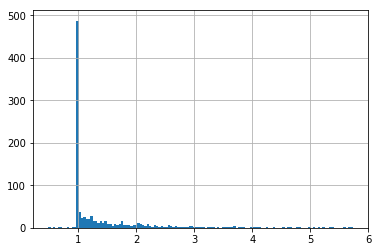

In [6]:
df_minimo = df_raw.sample(1000)
df_minimo['Qt-SM'].hist(bins=130)

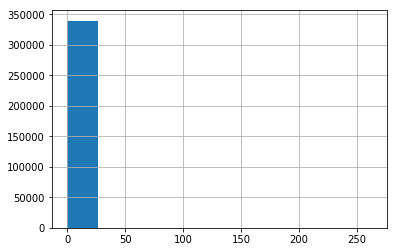

In [7]:
df_raw['Qt-SM'].hist(bins=10)

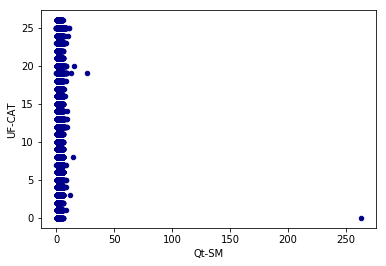

In [8]:
df_raw['UF-CAT'] = df_raw['UF'].astype('category').cat.codes
df_raw.plot.scatter(x='Qt-SM', y='UF-CAT' ,c='DarkBlue') 

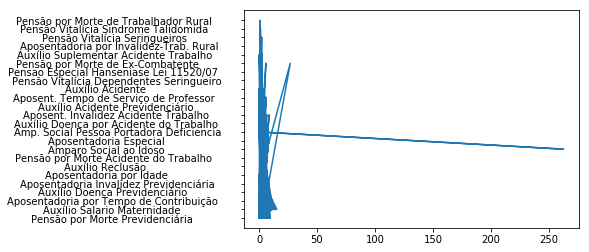

In [9]:
plt.plot( df_raw['Qt-SM'] , df_raw['Espécie'])

In [12]:
 df_raw['Espécie-CAT']  = df_raw['Espécie'].astype('category').cat.codes

In [16]:
df_especies = df_raw.groupby('Espécie')

In [21]:
df_especies.describe()

Competência concessão            \
                                                              count      mean   
Espécie                                                                         
Amp. Social Pessoa Portadora Deficiencia                    10063.0  201812.0   
Amparo Social ao Idoso                                       8565.0  201812.0   
Aposent. Invalidez Acidente Trabalho                          826.0  201812.0   
Aposent. Tempo de Serviço de Professor                        702.0  201812.0   
Aposentadoria Especial                                       1514.0  201812.0   
Aposentadoria Invalidez Previdenciária                      18975.0  201812.0   
Aposentadoria por Idade                                     43872.0  201812.0   
Aposentadoria por Invalidez-Trab. Rural                         2.0  201812.0   
Aposentadoria por Tempo de Contribuição                     22064.0  201812.0   
Auxílio Acidente                                             1552.0  201812.0   
Auxílio Acidente Previdenciário                              1463.0  201812.0   
Auxílio Doenca Previdenciário                              158713.0  201812.0   
Auxílio Doenca por Acidente do Trabalho                     13007.0  201812.0   
Auxílio Reclusão                                             1391.0  201812.0   
Auxílio Salario Maternidade                                 33571.0  201812.0   
Auxílio Suplementar Acidente Trabalho                           3.0  201812.0   
Pensao Especial Hanseniase Lei 11520/07                         4.0  201812.0   
Pensão Vitalícia Dependentes Seringueiro                       13.0  201812.0   
Pensão Vitalícia Seringueiros                                   9.0  201812.0   
Pensão Vitalícia Sindrome Talidomida                            1.0  201812.0   
Pensão por Morte Acidente do Trabalho                          11.0  201812.0   
Pensão por Morte Previdenciária                             23107.0  201812.0   
Pensão por Morte de Ex-Combatente                               5.0  201812.0   
Pensão por Morte de Trabalhador Rural                           1.0  201812.0   

                                                                        \
                                               std       min       25%   
Espécie                                                                  
Amp. Social Pessoa Portadora Deficiencia       0.0  201812.0  201812.0   
Amparo Social ao Idoso                         0.0  201812.0  201812.0   
Aposent. Invalidez Acidente Trabalho           0.0  201812.0  201812.0   
Aposent. Tempo de Serviço de Professor         0.0  201812.0  201812.0   
Aposentadoria Especial                         0.0  201812.0  201812.0   
Aposentadoria Invalidez Previdenciária         0.0  201812.0  201812.0   
Aposentadoria por Idade                        0.0  201812.0  201812.0   
Aposentadoria por Invalidez-Trab. Rural        0.0  201812.0  201812.0   
Aposentadoria por Tempo de Contribuição        0.0  201812.0  201812.0   
Auxílio Acidente                               0.0  201812.0  201812.0   
Auxílio Acidente Previdenciário                0.0  201812.0  201812.0   
Auxílio Doenca Previdenciário                  0.0  201812.0  201812.0   
Auxílio Doenca por Acidente do Trabalho        0.0  201812.0  201812.0   
Auxílio Reclusão                               0.0  201812.0  201812.0   
Auxílio Salario Maternidade                    0.0  201812.0  201812.0   
Auxílio Suplementar Acidente Trabalho          0.0  201812.0  201812.0   
Pensao Especial Hanseniase Lei 11520/07        0.0  201812.0  201812.0   
Pensão Vitalícia Dependentes Seringueiro       0.0  201812.0  201812.0   
Pensão Vitalícia Seringueiros                  0.0  201812.0  201812.0   
Pensão Vitalícia Sindrome Talidomida           NaN  201812.0  201812.0   
Pensão por Morte Acidente do Trabalho          0.0  201812.0  201812.0   
Pensão por Morte Previdenciária                0.0  201812.0  201812.0   
Pensão p

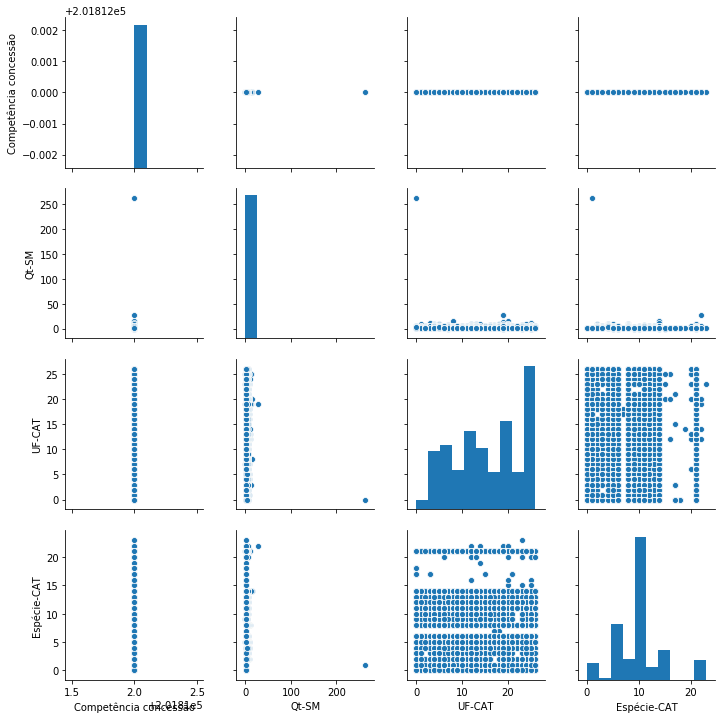

In [23]:
sns.pairplot(df_raw)